In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
mergedata = pd.read_csv(r"G:\Lord Ai\major project\Application_with_previous_data.csv")

In [3]:
mergedata.describe

<bound method NDFrame.describe of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AM

In [4]:
mergedata.shape

(1430155, 137)

In [5]:
obj_dtypes = [i for i in mergedata.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in mergedata.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [6]:
print("Categrical Columns")
for x in range(len(obj_dtypes)):
    print(obj_dtypes[x])

Categrical Columns
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE_x
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START_x
ORGANIZATION_TYPE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
NAME_CONTRACT_TYPE_y
WEEKDAY_APPR_PROCESS_START_y
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [7]:
print('Numerical')
for x in range(len(obj_dtypes)):
    print(num_dtypes[x])
    

Numerical
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


In [31]:
mergedata.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,1.000000,-0.001216,-0.002966,-0.000176,-0.001067,-0.001706,-0.000534,0.000278,-0.002193,0.000942,...,0.001576,-0.000408,0.001362,-0.000280,-0.001444,-0.000775,0.000308,-0.000222,-0.000124,0.000999
TARGET,-0.001216,1.000000,0.020310,-0.002658,-0.024281,-0.008248,-0.033213,-0.035312,0.074314,-0.047409,...,-0.016848,0.039735,-0.002528,0.026424,-0.022691,-0.004844,0.013126,0.012763,0.012369,0.000475
CNT_CHILDREN,-0.002966,0.020310,1.000000,0.011766,0.002738,0.029048,-0.001121,-0.022364,0.361370,-0.247283,...,0.005919,-0.012746,0.000769,-0.048964,-0.001530,0.003960,0.000558,-0.008634,-0.007489,-0.043688
AMT_INCOME_TOTAL,-0.000176,-0.002658,0.011766,1.000000,0.169428,0.210353,0.171134,0.079026,0.026539,-0.068294,...,0.011891,0.003924,0.001637,0.017667,-0.007035,-0.000320,0.005838,0.001058,0.001171,0.001192
AMT_CREDIT_x,-0.001067,-0.024281,0.002738,0.169428,1.000000,0.759241,0.986069,0.087402,-0.045247,-0.062971,...,0.024943,-0.059376,0.003419,0.033262,-0.005799,0.001342,0.008214,-0.047774,-0.041710,-0.012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,-0.000775,-0.004844,0.003960,-0.000320,0.001342,0.000782,0.000082,0.001160,0.012653,-0.013629,...,-0.021382,0.140367,-0.002300,-0.138358,0.004157,1.000000,0.503316,0.396908,0.321126,-0.114857
DAYS_LAST_DUE_1ST_VERSION,0.000308,0.013126,0.000558,0.005838,0.008214,0.001745,0.003383,0.005247,0.023587,-0.032001,...,-0.013522,0.065339,-0.007194,-0.262707,-0.809046,0.503316,1.000000,0.415094,0.490211,-0.218822
DAYS_LAST_DUE,-0.000222,0.012763,-0.008634,0.001058,-0.047774,-0.049549,-0.051017,-0.004208,-0.013960,0.014245,...,-0.096240,0.354743,-0.006119,0.070644,-0.254270,0.396908,0.415094,1.000000,0.927741,0.018773
DAYS_TERMINATION,-0.000124,0.012369,-0.007489,0.001171,-0.041710,-0.046093,-0.045483,-0.003357,-0.013513,0.010941,...,-0.095178,0.315186,-0.006487,0.045485,-0.396470,0.321126,0.490211,0.927741,1.000000,0.001998


In [14]:
num_col=["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START_x","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

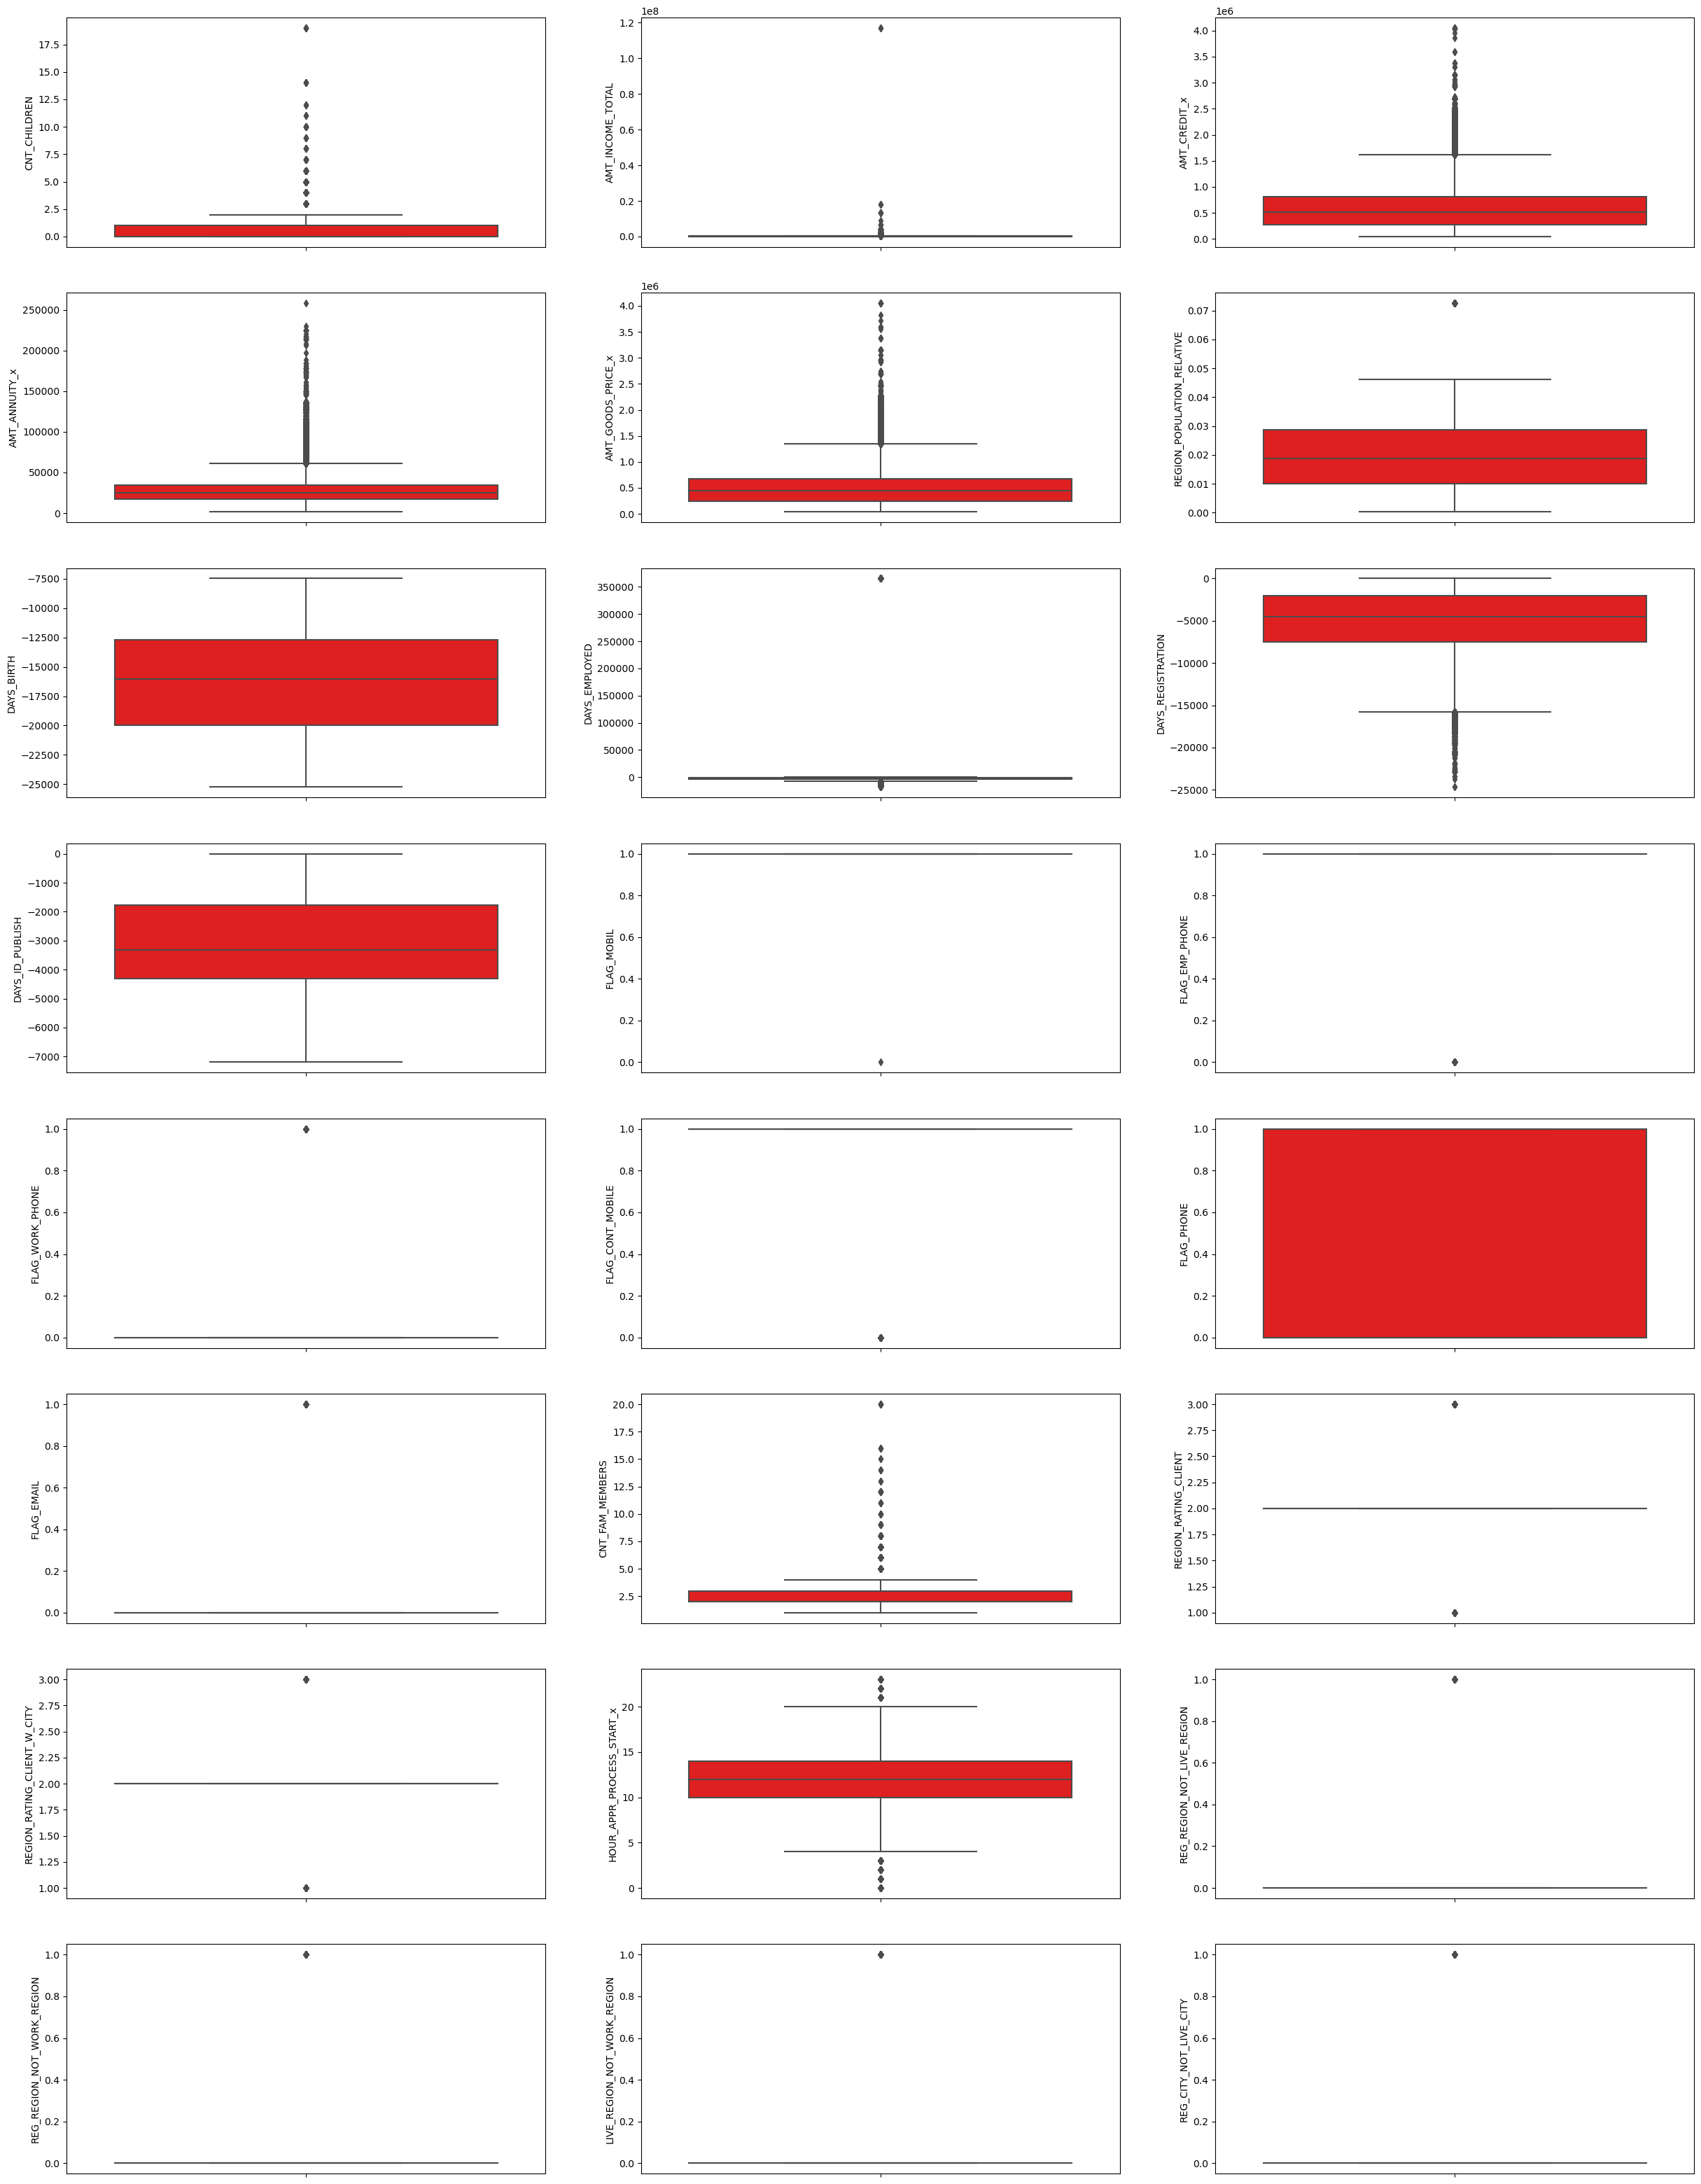

In [33]:
import itertools
import matplotlib.pyplot as plt

# Define the number of rows and columns in the subplot grid
n_rows = 8
n_cols = 3  

# Calculate the total number of subplots in the grid
total_subplots = n_rows * n_cols

# Create a new figure
plt.figure(figsize=[30,40])

for i, j in itertools.zip_longest(num_col, range(len(num_col))):
    if j < total_subplots:
        plt.subplot(n_rows, n_cols, j + 1)
        sns.boxplot(y=mergedata[i], orient="h", color="red")
    else:
        # Handle the case where there are more items in num_col than subplots
        break

plt.show()


In [26]:
import pandas as pd

# Assuming df is your DataFrame
# Define the list of columns for which you want to identify outliers
num_col=["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE",
         "FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START_x","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

# Calculate quartiles, IQR, and identify columns with outliers
outlier_columns = pd.DataFrame(index=num_col)

for column in num_col:
    Q1 = mergedata[column].quantile(0.25)
    Q3 = mergedata[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_columns[column] = (mergedata[column] < (Q1 - 1.5 * IQR)) | (mergedata[column] > (Q3 + 1.5 * IQR))

# List columns with outliers
columns_with_outliers = outlier_columns.any()

print(columns_with_outliers)


CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT_x                   False
AMT_ANNUITY_x                  False
AMT_GOODS_PRICE_x              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
HOUR_APPR_PROCESS_START_x      False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
REG_CITY_NOT_WORK_CITY         False
LIVE_CITY_NOT_WORK_CITY        False
EXT_SOURCE_1                   False
E

In [29]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
num_col=["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE",
         "FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START_x","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

outlier_columns = pd.DataFrame(index=num_col)

for column in num_col:
    # Calculate the Z-score for each data point in the column
    z_scores = np.abs((mergedata[column] - mergedata[column].mean()) / mergedata[column].std())
    # Set a threshold for identifying outliers, e.g., z_score > 3 (adjust as needed)
    outlier_columns[column] = z_scores > 3

# List columns with outliers
columns_with_outliers = outlier_columns.any()

print(columns_with_outliers)


CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT_x                   False
AMT_ANNUITY_x                  False
AMT_GOODS_PRICE_x              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
HOUR_APPR_PROCESS_START_x      False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
REG_CITY_NOT_WORK_CITY         False
LIVE_CITY_NOT_WORK_CITY        False
EXT_SOURCE_1                   False
E

In [34]:
import numpy as np

def log_transform(x):
    return np.log1p(x)

numerical_col = [
    "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x",
    "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "REGION_POPULATION_RELATIVE",
    "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE","HOUR_APPR_PROCESS_START_x","CNT_FAM_MEMBERS","REG_CITY_NOT_LIVE_CITY",
    "LIVE_REGION_NOT_WORK_REGION","REG_REGION_NOT_WORK_REGION","REG_REGION_NOT_LIVE_REGION","REGION_RATING_CLIENT_W_CITY","FLAG_EMAIL"
    
]

# Loop through the columns and log-transform them
for col_name in numerical_col:
    mergedata[col_name] = log_transform(mergedata[col_name])
    print(mergedata[col_name])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1430150    0.0
1430151    0.0
1430152    0.0
1430153    0.0
1430154    0.0
Name: CNT_CHILDREN, Length: 1430155, dtype: float64
0          12.218500
1          12.506181
2          12.506181
3          12.506181
4          11.119898
             ...    
1430150    11.967187
1430151    11.967187
1430152    11.967187
1430153    11.967187
1430154    11.967187
Name: AMT_INCOME_TOTAL, Length: 1430155, dtype: float64
0          12.915581
1          14.072865
2          14.072865
3          14.072865
4          11.813037
             ...    
1430150    13.422469
1430151    13.422469
1430152    13.422469
1430153    13.422469
1430154    13.422469
Name: AMT_CREDIT_x, Length: 1430155, dtype: float64
0          10.114619
1          10.482892
2          10.482892
3          10.482892
4           8.817446
             ...    
1430150    10.801991
1430151    10.801991
1430152    10.801991
1430153    10.801991
143

In [35]:
mergedata.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,1.000000,-0.001216,-0.002777,0.002980,-0.000382,-0.000718,0.000111,0.000276,NaN,0.004892,...,0.001576,-0.000408,0.001362,-0.000280,-0.001444,-0.000775,0.000308,-0.000222,-0.000124,0.000999
TARGET,-0.001216,1.000000,0.021418,-0.009483,-0.006560,0.004906,-0.016570,-0.035162,NaN,-0.012083,...,-0.016848,0.039735,-0.002528,0.026424,-0.022691,-0.004844,0.013126,0.012763,0.012369,0.000475
CNT_CHILDREN,-0.002777,0.021418,1.000000,0.027618,0.005191,0.031610,0.002015,-0.023053,NaN,-0.033111,...,0.007382,-0.013867,0.000931,-0.052888,-0.001192,0.004411,0.000378,-0.009547,-0.008478,-0.047235
AMT_INCOME_TOTAL,0.002980,-0.009483,0.027618,1.000000,0.398326,0.461823,0.400729,0.157508,NaN,-0.001040,...,0.026761,0.016581,0.004485,0.045810,-0.019569,0.000392,0.017743,0.005297,0.005450,0.006130
AMT_CREDIT_x,-0.000382,-0.006560,0.005191,0.398326,1.000000,0.840050,0.987808,0.078916,NaN,0.002011,...,0.022864,-0.053508,0.003445,0.038404,-0.014264,0.001941,0.015576,-0.038913,-0.032777,-0.012679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,-0.000775,-0.004844,0.004411,0.000392,0.001941,0.001655,0.000148,0.001187,NaN,-0.003321,...,-0.021382,0.140367,-0.002300,-0.138358,0.004157,1.000000,0.503316,0.396908,0.321126,-0.114857
DAYS_LAST_DUE_1ST_VERSION,0.000308,0.013126,0.000378,0.017743,0.015576,0.008284,0.009654,0.005174,NaN,-0.004528,...,-0.013522,0.065339,-0.007194,-0.262707,-0.809046,0.503316,1.000000,0.415094,0.490211,-0.218822
DAYS_LAST_DUE,-0.000222,0.012763,-0.009547,0.005297,-0.038913,-0.046492,-0.042744,-0.004364,NaN,-0.000438,...,-0.096240,0.354743,-0.006119,0.070644,-0.254270,0.396908,0.415094,1.000000,0.927741,0.018773
DAYS_TERMINATION,-0.000124,0.012369,-0.008478,0.005450,-0.032777,-0.042207,-0.037242,-0.003517,NaN,-0.000224,...,-0.095178,0.315186,-0.006487,0.045485,-0.396470,0.321126,0.490211,0.927741,1.000000,0.001998


In [36]:
print("Categrical Columns")
for x in range(len(obj_dtypes)):
    print(obj_dtypes[x])

Categrical Columns
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE_x
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START_x
ORGANIZATION_TYPE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
NAME_CONTRACT_TYPE_y
WEEKDAY_APPR_PROCESS_START_y
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [40]:
categorical_columns = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE_x','OCCUPATION_TYPE',
                      'WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y',
                      'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                      'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']


for col in categorical_columns:
    mergedata[col] = pd.Categorical(mergedata[col])

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    mergedata[col] = label_encoder.fit_transform(mergedata[col])


In [42]:
print(mergedata)

         SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0            100002       1                     0            1             0   
1            100003       0                     0            0             0   
2            100003       0                     0            0             0   
3            100003       0                     0            0             0   
4            100004       0                     1            1             1   
...             ...     ...                   ...          ...           ...   
1430150      456255       0                     0            0             0   
1430151      456255       0                     0            0             0   
1430152      456255       0                     0            0             0   
1430153      456255       0                     0            0             0   
1430154      456255       0                     0            0             0   

         FLAG_OWN_REALTY  CNT_CHILDREN 

In [44]:
cat_col = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE_x','OCCUPATION_TYPE',
                      'WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y',
                      'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                      'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

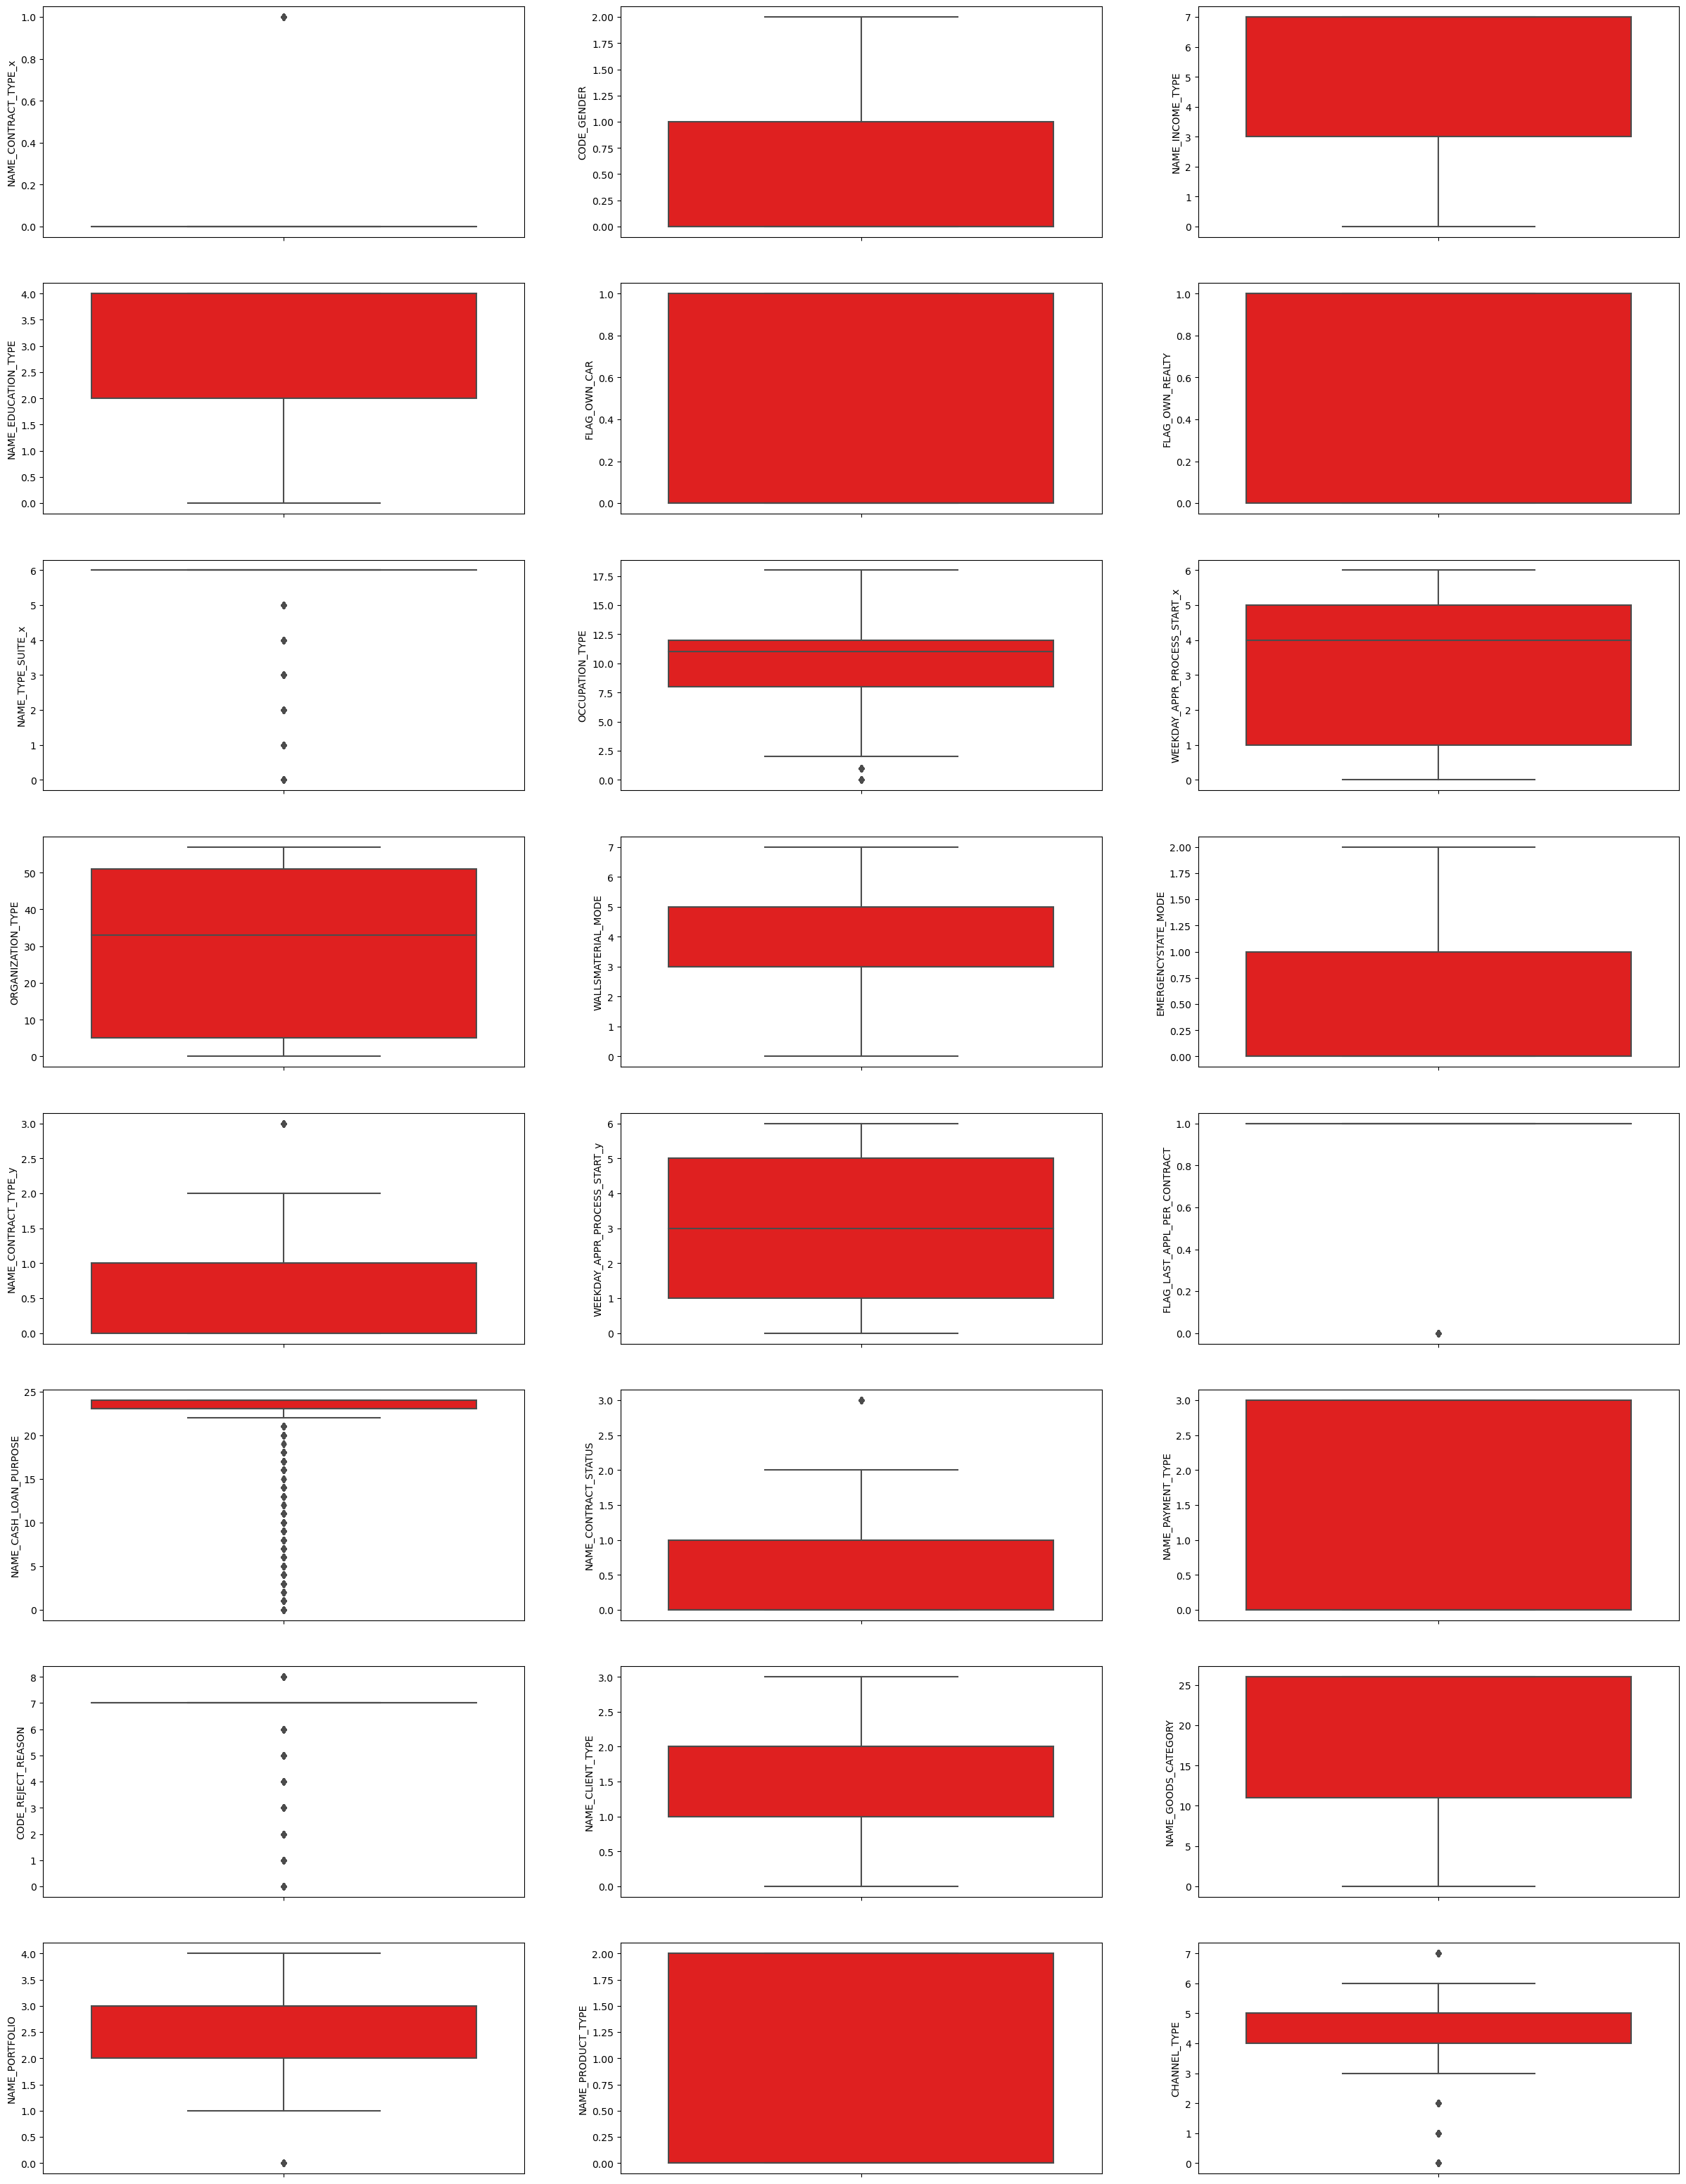

In [45]:
import itertools
import matplotlib.pyplot as plt

# Define the number of rows and columns in the subplot grid
n_rows = 8
n_cols = 3  

# Calculate the total number of subplots in the grid
total_subplots = n_rows * n_cols

# Create a new figure
plt.figure(figsize=[30,40])

for i, j in itertools.zip_longest(cat_col, range(len(cat_col))):
    if j < total_subplots:
        plt.subplot(n_rows, n_cols, j + 1)
        sns.boxplot(y=mergedata[i], orient="h", color="red")
    else:
        # Handle the case where there are more items in num_col than subplots
        break

plt.show()


In [46]:
import pandas as pd

# Assuming df is your DataFrame
# Define the list of columns for which you want to identify outliers
cat_col = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE_x','OCCUPATION_TYPE',
                      'WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y',
                      'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                      'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

# Calculate quartiles, IQR, and identify columns with outliers
outlier_columns = pd.DataFrame(index=cat_col)

for column in cat_col:
    Q1 = mergedata[column].quantile(0.25)
    Q3 = mergedata[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_columns[column] = (mergedata[column] < (Q1 - 1.5 * IQR)) | (mergedata[column] > (Q3 + 1.5 * IQR))

# List columns with outliers
columns_with_outliers = outlier_columns.any()

print(columns_with_outliers)

NAME_CONTRACT_TYPE_x            False
CODE_GENDER                     False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
NAME_TYPE_SUITE_x               False
OCCUPATION_TYPE                 False
WEEKDAY_APPR_PROCESS_START_x    False
ORGANIZATION_TYPE               False
WALLSMATERIAL_MODE              False
EMERGENCYSTATE_MODE             False
NAME_CONTRACT_TYPE_y            False
WEEKDAY_APPR_PROCESS_START_y    False
FLAG_LAST_APPL_PER_CONTRACT     False
NAME_CASH_LOAN_PURPOSE          False
NAME_CONTRACT_STATUS            False
NAME_PAYMENT_TYPE               False
CODE_REJECT_REASON              False
NAME_CLIENT_TYPE                False
NAME_GOODS_CATEGORY             False
NAME_PORTFOLIO                  False
NAME_PRODUCT_TYPE               False
CHANNEL_TYPE                    False
NAME_SELLER_INDUSTRY            False
NAME_YIELD_GROUP                False
PRODUCT_COMB

In [47]:
import numpy as np

def log_transform(x):
    return np.log1p(x)

cate_col = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE_x','OCCUPATION_TYPE',
                      'WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y',
                      'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                      'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
    


# Loop through the columns and log-transform them
for col_name in cate_col:
    mergedata[col_name] = log_transform(mergedata[col_name])
    print(mergedata[col_name])

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.693147
             ...   
1430150    0.000000
1430151    0.000000
1430152    0.000000
1430153    0.000000
1430154    0.000000
Name: NAME_CONTRACT_TYPE_x, Length: 1430155, dtype: float64
0          0.693147
1          0.000000
2          0.000000
3          0.000000
4          0.693147
             ...   
1430150    0.000000
1430151    0.000000
1430152    0.000000
1430153    0.000000
1430154    0.000000
Name: CODE_GENDER, Length: 1430155, dtype: float64
0          2.079442
1          1.609438
2          1.609438
3          1.609438
4          2.079442
             ...   
1430150    0.693147
1430151    0.693147
1430152    0.693147
1430153    0.693147
1430154    0.693147
Name: NAME_INCOME_TYPE, Length: 1430155, dtype: float64
0          1.609438
1          0.693147
2          0.693147
3          0.693147
4          1.609438
             ...   
1430150    0.693147
1430151    0.693147
1430152    0.

In [48]:
mergedata.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,1.000000,-0.001216,0.002246,0.001360,0.000812,0.000246,-0.002777,0.002980,-0.000382,-0.000718,...,0.000235,-0.000280,0.000102,-0.000348,-0.001444,-0.000775,0.000308,-0.000222,-0.000124,0.000999
TARGET,-0.001216,1.000000,-0.032653,0.052328,-0.014932,-0.006583,0.021418,-0.009483,-0.006560,0.004906,...,0.015157,0.026424,-0.033234,-0.036263,-0.022691,-0.004844,0.013126,0.012763,0.012369,0.000475
NAME_CONTRACT_TYPE_x,0.002246,-0.032653,1.000000,-0.003052,0.007553,0.047745,0.029986,-0.045215,-0.205131,-0.273482,...,-0.044685,-0.010151,0.020518,0.041395,0.047101,-0.026097,-0.057739,0.013787,0.003846,-0.019805
CODE_GENDER,0.001360,0.052328,-0.003052,1.000000,0.347791,-0.047428,0.072304,0.203624,0.011067,0.073431,...,-0.044842,-0.045218,-0.019191,0.008645,-0.002672,-0.001633,0.000091,-0.017451,-0.015814,-0.030475
FLAG_OWN_CAR,0.000812,-0.014932,0.007553,0.347791,1.000000,-0.005889,0.118428,0.210672,0.103825,0.135636,...,-0.056445,-0.019839,0.010354,0.034598,0.006741,-0.001521,-0.007170,-0.023390,-0.021915,-0.037616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,-0.000775,-0.004844,-0.026097,-0.001633,-0.001521,0.008452,0.004411,0.000392,0.001941,0.001655,...,0.071306,-0.138358,-0.202475,-0.271610,0.004157,1.000000,0.503316,0.396908,0.321126,-0.114857
DAYS_LAST_DUE_1ST_VERSION,0.000308,0.013126,-0.057739,0.000091,-0.007170,0.003338,0.000378,0.017743,0.015576,0.008284,...,0.178030,-0.262707,-0.418380,-0.553032,-0.809046,0.503316,1.000000,0.415094,0.490211,-0.218822
DAYS_LAST_DUE,-0.000222,0.012763,0.013787,-0.017451,-0.023390,0.026987,-0.009547,0.005297,-0.038913,-0.046492,...,0.179644,0.070644,-0.116037,-0.240764,-0.254270,0.396908,0.415094,1.000000,0.927741,0.018773
DAYS_TERMINATION,-0.000124,0.012369,0.003846,-0.015814,-0.021915,0.024000,-0.008478,0.005450,-0.032777,-0.042207,...,0.179527,0.045485,-0.148012,-0.285120,-0.396470,0.321126,0.490211,0.927741,1.000000,0.001998
